# Sales Conversion Optimization - Data Exploration & Preprocessing

**Problem Statement**: Optimize sales conversions of anonymous organization's through soial media advertisement campaigns.

#### Here's the data description
- The dataset contains details about the campaign/ad and the person to whom the ad was shown with total money spend by that person & total product purchased after seeing the ad.
| Feature             | Description                                                   | Data Type      |
|---------------------|---------------------------------------------------------------|----------------|
| ad_id               | Unique ID for each ad.                                        | Numerical      |
| xyz_campaign_id     | ID associated with each ad campaign of XYZ company.           | Categorical    |
| fb_campaign_id      | ID for how Facebook tracks each campaign.                      | Categorical    |
| age                 | Age of the person to whom the ad is shown.                     | Numerical      |
| gender              | Gender of the person to whom the ad is shown.                  | Categorical    |
| interest            | Code specifying the category of the person’s interests.       | Categorical    |
| Impressions         | Number of times the ad was shown.                             | Numerical      |
| Clicks              | Number of clicks on the ad.                                   | Numerical      |
| Spent               | Amount paid by company XYZ to Facebook for the ad.            | Numerical      |
| Total conversion    | Total number of inquiries about the product after seeing the ad. | Numerical   |
| Approved conversion | Total number of product purchases after seeing the ad.        | Numerical      |


## Importing the necessary libraries

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [337]:
import matplotlib

### Reading the dataset

In [338]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/KAG_conversion_data.csv')

In [339]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Data Exploration

In [340]:
# Getting basic information about the data
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [341]:
for col in df.columns:
  print(f'{col} has total unique values: ', df[col].nunique())

ad_id has total unique values:  1143
xyz_campaign_id has total unique values:  3
fb_campaign_id has total unique values:  691
age has total unique values:  4
gender has total unique values:  2
interest has total unique values:  40
Impressions has total unique values:  1130
Clicks has total unique values:  183
Spent has total unique values:  869
Total_Conversion has total unique values:  32
Approved_Conversion has total unique values:  16


**Note**:
- ad_id, xyz_campaign_id,intrest are categorical variables.
- Gender has only 2 values Males or Female
- Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion are continuous
- Age is in bins/range eg 18-30

<ipython-input-342-6d968c6cf6e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

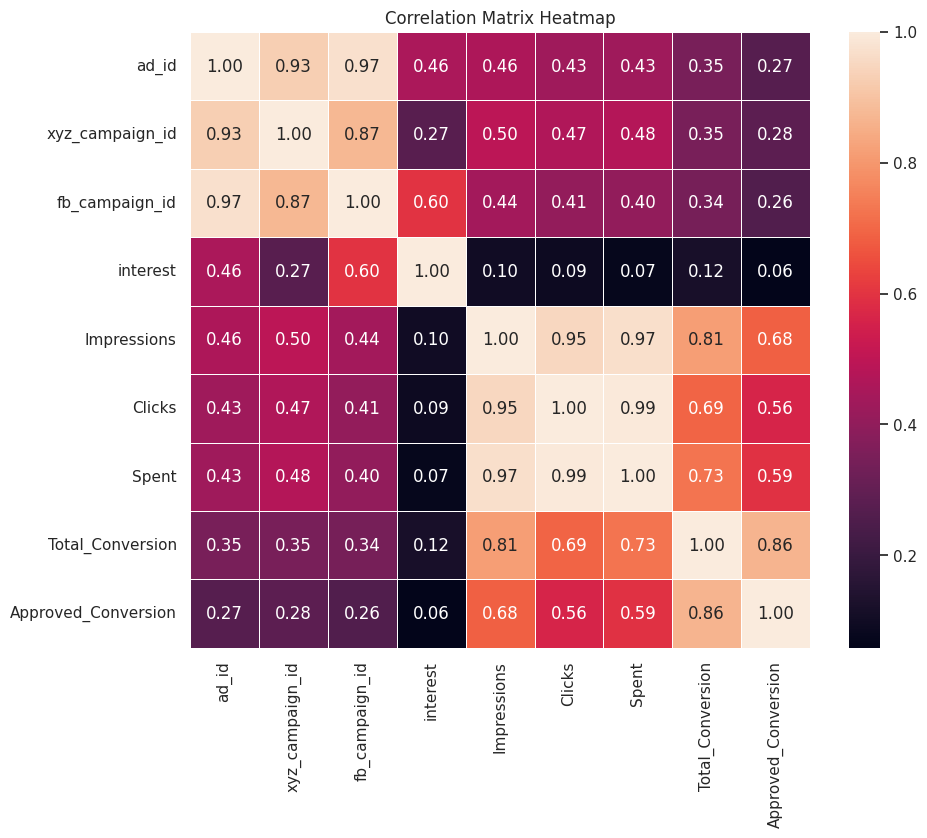

In [342]:
# Assuming your DataFrame is named 'df'
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Matrix Heatmap')

**Conclusion**
- Impression, Spent, Total Conversion share very high correlation with each other.
- Alongside Total Conversion and Approved Conversion also have high correlation.

<Figure size 1000x1000 with 0 Axes>

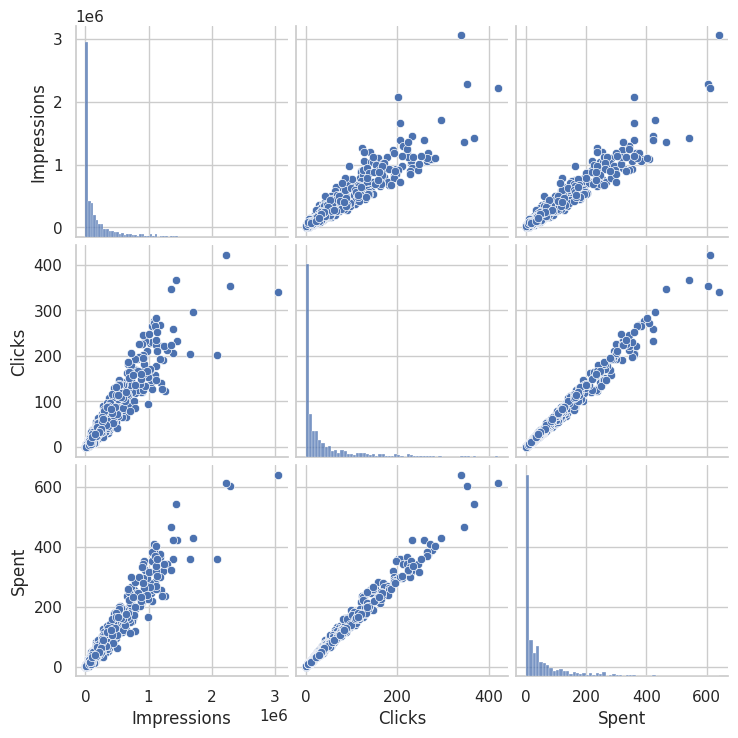

In [343]:
# Pair plot
plt.figure(figsize = (10, 10))
sns.pairplot(data = df[['Impressions', 'Clicks', 'Spent']])

In [344]:
# Checking for missing values
null_values = df.isnull().sum()
null_values[null_values > 0]

Series([], dtype: int64)

In [345]:
# Checking unique values in gender column
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [346]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

<Axes: >

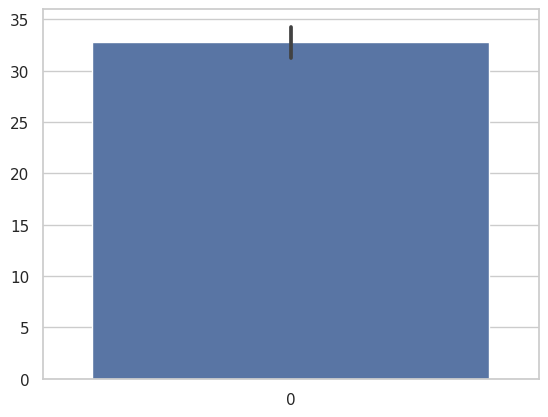

In [347]:
sns.barplot(data = df['interest'])

**Insights**
- Are are no missing values in every column.
- Age in age column are divided into bins.

## Data Cleaning and Preprocessing

In [348]:
# Checking for duplicated records
df.duplicated().sum()

0

### Checking for outliers

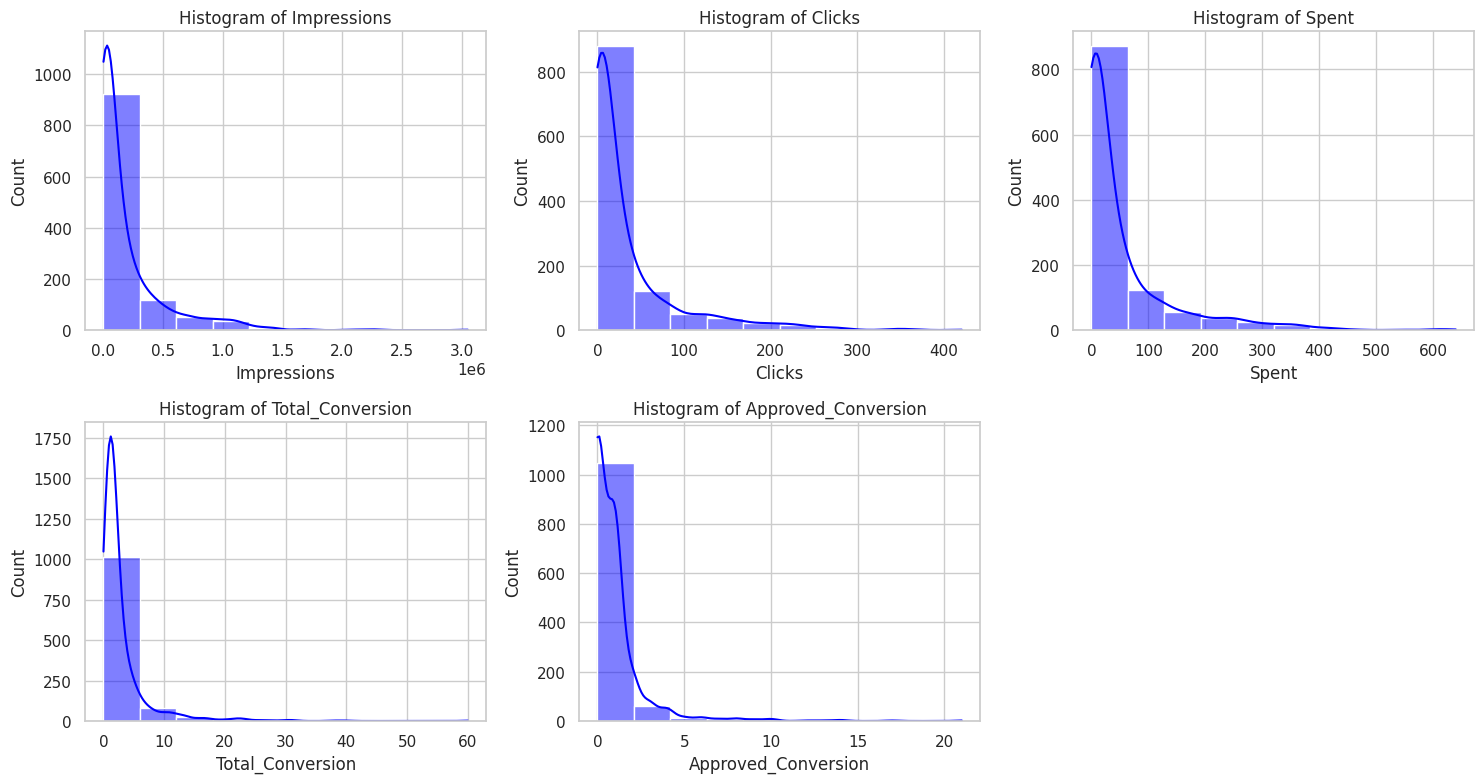

In [349]:
# Visual Inspection for checking outliers
cols_to_plot = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

# Set the style of seaborn
# sns.set(style="whitegrid")

# Create subplots for each numeric column
plt.figure(figsize=(15, 8))
for i, column in enumerate(cols_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True, bins=10 , color = 'blue')
    plt.title(f'Histogram of {column}')

# Adjust layout
plt.tight_layout()

Text(0.5, 1.0, 'Box Plots for Numeric Columns')

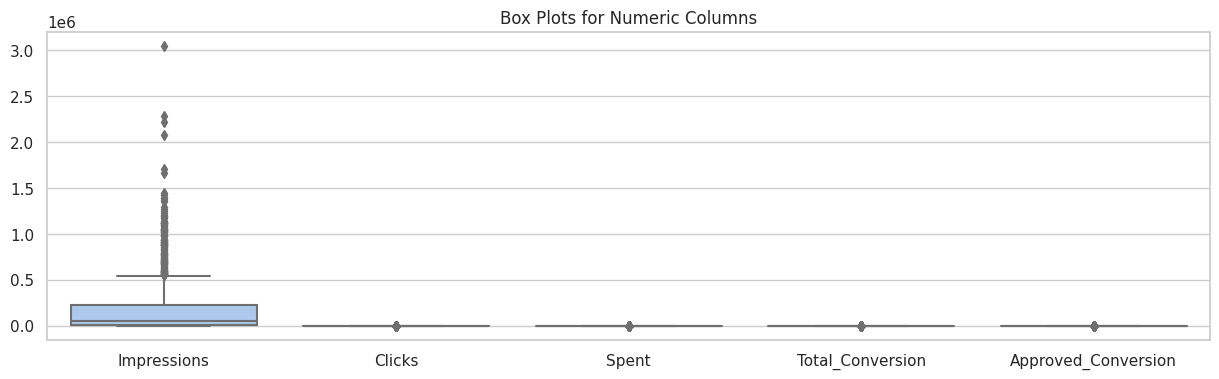

In [350]:
# Assuming your DataFrame is named 'df'
cols_to_plot = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot for each numeric column
plt.figure(figsize=(15, 4))
sns.boxplot(data=df[cols_to_plot], palette='pastel')
plt.title('Box Plots for Numeric Columns')

#### Checking for outliers with IQR method

In [351]:
# Function that gives max and min bound for a column
def calculates_lower_upper_bound(numeric_column):
    """Function that gives lower and upper bound for a numeric column"""
    q1 = numeric_column.quantile(0.25)
    q3 = numeric_column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [352]:
# Getting columns with outliers
numerical_cols = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']
cols_with_outliers = []

for col in numerical_cols:
    lower_bound, upper_bound = calculates_lower_upper_bound(df[col])
    total_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if total_outliers > 0:
        cols_with_outliers.append(col)
    print(f'{col} has total outliers: ', total_outliers)


Impressions has total outliers:  123
Clicks has total outliers:  127
Spent has total outliers:  125
Total_Conversion has total outliers:  105
Approved_Conversion has total outliers:  95


### Capping outliers with min and max values



In [353]:
# Replacing greater than upper bound with upper_bound & value greater than upper bound with upper bound
for col in cols_with_outliers:
    lower_bound, upper_bound = calculates_lower_upper_bound(df[col])
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [354]:
# Checking if still there are outliers
for col in numerical_cols:
  lower_bound, upper_bound = calculates_lower_upper_bound(df[col])
  total_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
  print(f'{col} has total outliers:', total_outliers)


Impressions has total outliers: 0
Clicks has total outliers: 0
Spent has total outliers: 0
Total_Conversion has total outliers: 0
Approved_Conversion has total outliers: 0


### Splitting the age column into bounds

In [355]:
df['age_lower_bound'] = df['age'].apply(lambda age: age[0:2])
df['age_upper_bound'] = df['age'].apply(lambda age: age[3:5])
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_lower_bound,age_upper_bound
0,708746,916,103916,30-34,M,15,7350.0,1.0,1.43,2,1.0,30,34
1,708749,916,103917,30-34,M,16,17861.0,2.0,1.82,2,0.0,30,34
2,708771,916,103920,30-34,M,20,693.0,0.0,0.00,1,0.0,30,34
3,708815,916,103928,30-34,M,28,4259.0,1.0,1.25,1,0.0,30,34
4,708818,916,103928,30-34,M,28,4133.0,1.0,1.29,1,1.0,30,34


#### Saving the preprocessed data

In [356]:
df.to_csv('preprocessed.csv')